In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()  # ustawia srodowisko dla ladnego printowania

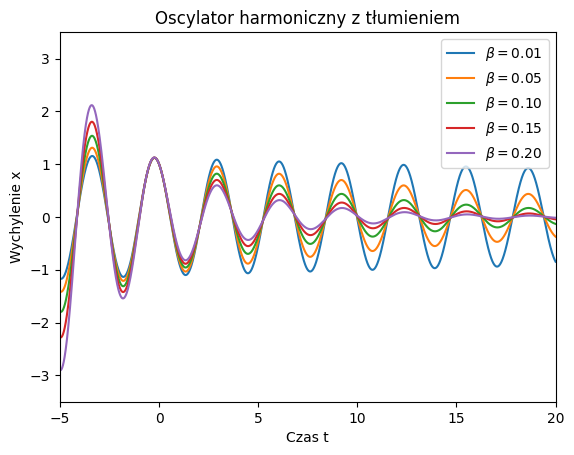

In [5]:
# oscylator tlumiony

x = sp.Function('x') # funkcja
w0 = sp.Symbol('omega_0', real = True, positive = True)
t = sp.Symbol('t', real = True)
beta = sp.Symbol('beta', real = True) # tlumienie

#warunki poczatkowe
x0 = sp.Symbol('x_0', real = True)
v0 = sp.Symbol('v_0', real = True)

#rownanie
rownanie_tlumiony = sp.Eq(x(t).diff(t,t), -w0**2 * x(t) - 2 * beta * x(t).diff(t))

# rozwiazanie rownania rozniczkowego
solution_tlumiony = sp.dsolve(rownanie_tlumiony, x(t), ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})

# konwertuje wyrazenie do funkcji numpy
sol_np_tlumiony_001 = sp.lambdify(t, solution_tlumiony.rhs.subs({x0: 1, v0: -1, w0: 2, beta: 0.01})) 
sol_np_tlumiony_005 = sp.lambdify(t, solution_tlumiony.rhs.subs({x0: 1, v0: -1, w0: 2, beta: 0.05})) 
sol_np_tlumiony_010 = sp.lambdify(t, solution_tlumiony.rhs.subs({x0: 1, v0: -1, w0: 2, beta: 0.10})) 
sol_np_tlumiony_015 = sp.lambdify(t, solution_tlumiony.rhs.subs({x0: 1, v0: -1, w0: 2, beta: 0.15})) 
sol_np_tlumiony_020 = sp.lambdify(t, solution_tlumiony.rhs.subs({x0: 1, v0: -1, w0: 2, beta: 0.20})) 


tab_t = np.linspace(-5, 20, 5000)
plt.plot(tab_t, sol_np_tlumiony_001(tab_t), label = r'$\beta = 0.01$')
plt.plot(tab_t, sol_np_tlumiony_005(tab_t), label = r'$\beta = 0.05$')
plt.plot(tab_t, sol_np_tlumiony_010(tab_t), label = r'$\beta = 0.10$')
plt.plot(tab_t, sol_np_tlumiony_015(tab_t), label = r'$\beta = 0.15$')
plt.plot(tab_t, sol_np_tlumiony_020(tab_t), label = r'$\beta = 0.20$')

plt.axis([-5.01, 20.01, -3.5, 3.5])

plt.ylabel('Wychylenie x')
plt.xlabel('Czas t')

plt.title('Oscylator harmoniczny z tłumieniem')

plt.legend(loc = 'upper right')

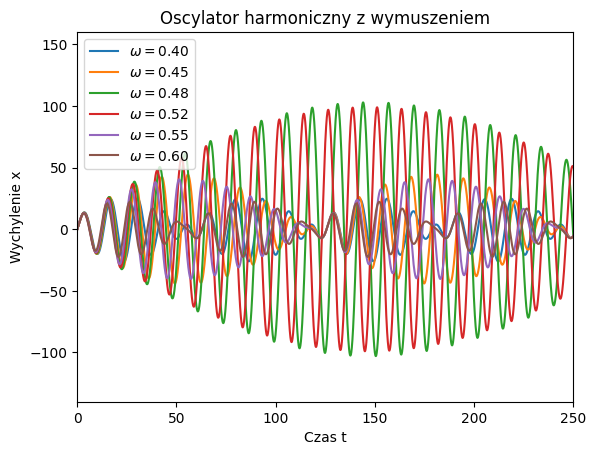

In [55]:
# oscylator z wymuszeniem

x = sp.Function('x') # funkcja
w0 = sp.Symbol('omega_0', real = True, positive = True)
t = sp.Symbol('t', real = True)
A = sp.Symbol('A', real = True) # amplituda
w = sp.Symbol('omega', real = True, positive = True) #czestosc wymuszajaca

#warunki poczatkowe
x0 = sp.Symbol('x_0', real = True)
v0 = sp.Symbol('v_0', real = True)

#rownanie
rownanie_wymuszenie = sp.Eq(x(t).diff(t,t), -w0**2 * x(t) + A * sp.cos(w*t))

# rozwiazanie rownania rozniczkowego
solution_wymuszenie = sp.dsolve(rownanie_wymuszenie, x(t), ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0}) 

# konwertuje wyrazenie do funkcji numpy
sol_np_wymuszenie_2 = sp.lambdify(t, solution_wymuszenie.rhs.subs({x0: 0, v0: 5, w0: 0.5, A: 1, w: 0.40})) 
sol_np_wymuszenie_4 = sp.lambdify(t, solution_wymuszenie.rhs.subs({x0: 0, v0: 5, w0: 0.5, A: 1, w: 0.45})) 
sol_np_wymuszenie_6 = sp.lambdify(t, solution_wymuszenie.rhs.subs({x0: 0, v0: 5, w0: 0.5, A: 1, w: 0.48})) 
sol_np_wymuszenie_7 = sp.lambdify(t, solution_wymuszenie.rhs.subs({x0: 0, v0: 5, w0: 0.5, A: 1, w: 0.52})) 
sol_np_wymuszenie_8 = sp.lambdify(t, solution_wymuszenie.rhs.subs({x0: 0, v0: 5, w0: 0.5, A: 1, w: 0.55})) 
sol_np_wymuszenie_10 = sp.lambdify(t, solution_wymuszenie.rhs.subs({x0: 0, v0: 5, w0: 0.5, A: 1, w: 0.60})) 

tab_t = np.linspace(0, 250, 5000)

plt.clf()

plt.plot(tab_t, sol_np_wymuszenie_2(tab_t), label = r'$\omega = 0.40$')
plt.plot(tab_t, sol_np_wymuszenie_4(tab_t), label = r'$\omega = 0.45$')
plt.plot(tab_t, sol_np_wymuszenie_6(tab_t), label = r'$\omega = 0.48$')
plt.plot(tab_t, sol_np_wymuszenie_7(tab_t), label = r'$\omega = 0.52$')
plt.plot(tab_t, sol_np_wymuszenie_8(tab_t), label = r'$\omega = 0.55$')
plt.plot(tab_t, sol_np_wymuszenie_10(tab_t), label = r'$\omega = 0.60$')

plt.axis([0, 250, -140, 160])

plt.ylabel('Wychylenie x')
plt.xlabel('Czas t')

plt.title('Oscylator harmoniczny z wymuszeniem')

plt.legend(loc = 'upper left')

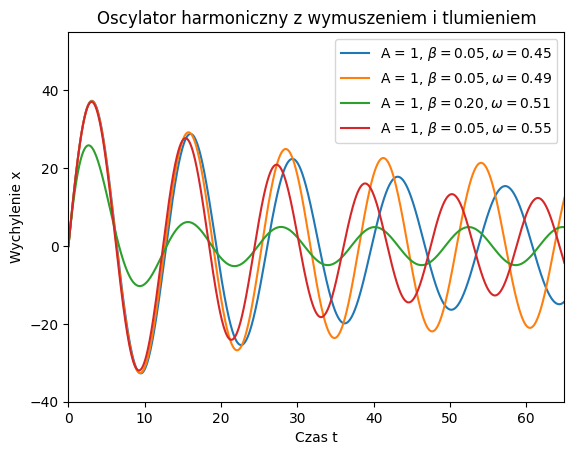

In [52]:
# oscylator z wymuszeniem i tlumieniem

x = sp.Function('x') # funkcja
w0 = sp.Symbol('omega_0', real = True, positive = True)
t = sp.Symbol('t', real = True)
A = sp.Symbol('A', real = True) # wymuszenie
beta = sp.Symbol('beta', real = True) # tlumienie
w = sp.Symbol('omega', real = True, positive = True)


#warunki poczatkowe
x0 = sp.Symbol('x_0', real = True)
v0 = sp.Symbol('v_0', real = True)

#rownanie
rownanie_wymuszenie_tlumienie = sp.Eq(x(t).diff(t,t), -w0**2 * x(t) + A * sp.cos(w*t) - 2 * beta * x(t).diff(t))

# rozwiazanie rownania rozniczkowego
solution_wymuszenie_tlumienie = sp.dsolve(rownanie_wymuszenie_tlumienie, x(t), ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0}) 

# konwertuje wyrazenie do funkcji numpy
sol_np_wymuszenie_tlumienie_2_001 = sp.lambdify(t, solution_wymuszenie_tlumienie.rhs.subs({x0: 0, v0: 20, w0: 0.5, A: 1, beta: 0.05, w: 0.45})) 
sol_np_wymuszenie_tlumienie_10_020 = sp.lambdify(t, solution_wymuszenie_tlumienie.rhs.subs({x0: 0, v0: 20, w0: 0.5, A: 1, beta: 0.05, w: 0.49})) 
sol_np_wymuszenie_tlumienie_10_001 = sp.lambdify(t, solution_wymuszenie_tlumienie.rhs.subs({x0: 0, v0: 20, w0: 0.5, A: 1, beta: 0.20, w: 0.51})) 
sol_np_wymuszenie_tlumienie_6_010 = sp.lambdify(t, solution_wymuszenie_tlumienie.rhs.subs({x0: 0, v0: 20, w0: 0.5, A: 1, beta: 0.05, w: 0.55})) 

tab_t = np.linspace(0, 65, 5000)

plt.clf()

plt.plot(tab_t, sol_np_wymuszenie_tlumienie_2_001(tab_t), label = 'A = 1,' + r' $\beta = 0.05,\omega = 0.45$')
plt.plot(tab_t, sol_np_wymuszenie_tlumienie_10_020(tab_t), label = 'A = 1,' + r' $\beta = 0.05,\omega = 0.49$')
plt.plot(tab_t, sol_np_wymuszenie_tlumienie_10_001(tab_t), label = 'A = 1,' + r' $\beta = 0.20,\omega = 0.51$')
plt.plot(tab_t, sol_np_wymuszenie_tlumienie_6_010(tab_t), label = 'A = 1,' + r' $\beta = 0.05,\omega = 0.55$')

plt.axis([0, 65, -40, 55])

plt.ylabel('Wychylenie x')
plt.xlabel('Czas t')

plt.title('Oscylator harmoniczny z wymuszeniem i tlumieniem')

plt.legend(loc = 'upper right')